# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"

temperature = []
humidity = []
cloudiness = []
wind_speed = []
city_name = []
lat = []
lng = []
country = []
date = []

print(f'Beginning Data Retrieval')
print(f'-----------------------------')
for city in cities:
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        city_name.append(city)
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        print(f'Processing Record {cities.index(city)} | {city}')
    except:
        print("City not found.")

Beginning Data Retrieval
-----------------------------
Processing Record 0 | norman wells
Processing Record 1 | lara
Processing Record 2 | east london
Processing Record 3 | hobart
Processing Record 4 | rikitea
Processing Record 5 | los llanos de aridane
Processing Record 6 | hami
Processing Record 7 | barrow
Processing Record 8 | faanui
Processing Record 9 | kahului
Processing Record 10 | khani
City not found.
Processing Record 12 | inirida
Processing Record 13 | sibut
Processing Record 14 | kitgum
Processing Record 15 | joshimath
City not found.
Processing Record 17 | bayan
Processing Record 18 | nikolskoye
Processing Record 19 | port augusta
Processing Record 20 | avarua
Processing Record 21 | carnarvon
Processing Record 22 | punta arenas
Processing Record 23 | bluff
Processing Record 24 | dikson
Processing Record 25 | karratha
Processing Record 26 | sitka
Processing Record 27 | yerbogachen
Processing Record 28 | ponta do sol
Processing Record 29 | yicheng
City not found.
Processing 

Processing Record 261 | aripuana
Processing Record 262 | walvis bay
Processing Record 263 | stratford-upon-avon
Processing Record 264 | tadine
Processing Record 265 | amapa
City not found.
Processing Record 267 | chumikan
Processing Record 268 | mahebourg
Processing Record 269 | kodiak
Processing Record 270 | sao filipe
City not found.
Processing Record 272 | danielskuil
Processing Record 273 | cabo san lucas
Processing Record 274 | acapulco
Processing Record 275 | bethanien
Processing Record 276 | geraldton
Processing Record 277 | kalmunai
Processing Record 278 | havelock
Processing Record 279 | homer
Processing Record 280 | isangel
Processing Record 281 | preobrazheniye
Processing Record 282 | belmonte
Processing Record 283 | nuuk
Processing Record 284 | srednekolymsk
Processing Record 285 | coahuayana
Processing Record 286 | newport
Processing Record 287 | bonthe
Processing Record 288 | bilma
Processing Record 289 | belozerskoye
Processing Record 290 | samarai
Processing Record 291 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudiness, "Country": country, "Date": date,
                           "Humidity": humidity, "Latitude": lat, "Longitude": lng, "Temperature": temperature,
                           "Wind Speed": wind_speed})

weather_df.to_csv(output_data_file)

weather_df.head(20)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Temperature,Wind Speed
0,norman wells,90,CA,1578774781,70,65.28,-126.83,-2.20,10.29
1,lara,90,AU,1578774781,93,-38.02,144.40,56.26,8.05
2,east london,78,ZA,1578774781,89,-33.02,27.91,74.37,10.33
3,hobart,75,AU,1578774648,54,-42.88,147.33,55.62,5.82
4,rikitea,20,PF,1578774781,80,-23.12,-134.97,75.70,18.63
5,los llanos de aridane,75,ES,1578774781,68,28.66,-17.92,60.55,14.99
6,hami,0,CN,1578774781,53,42.80,93.45,13.48,5.32
7,barrow,40,US,1578774782,75,71.29,-156.79,-18.40,19.46
8,faanui,72,PF,1578774782,79,-16.48,-151.75,81.64,19.73
9,kahului,75,US,1578774687,88,20.89,-156.47,71.80,17.22


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

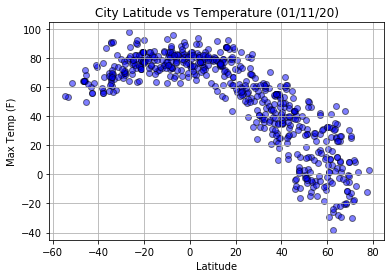

<Figure size 432x288 with 0 Axes>

In [32]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], color = 'blue', marker = 'o', edgecolor = 'black', alpha = ".5")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Temperature (%s)" % time.strftime("%x")) 
plt.show()
plt.savefig("LatVsTemp.png")

#### Latitude vs. Humidity Plot

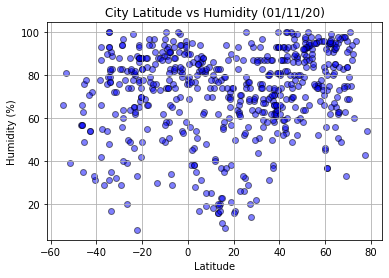

<Figure size 432x288 with 0 Axes>

In [33]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], color = 'blue', marker = 'o', edgecolor = 'black', alpha = ".5")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) 
plt.show()
plt.savefig("LatVsHumidity.png")

#### Latitude vs. Cloudiness Plot

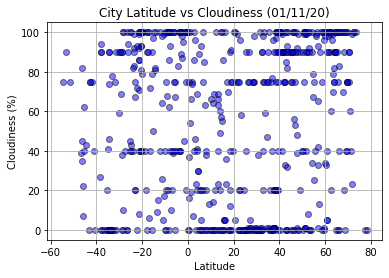

<Figure size 432x288 with 0 Axes>

In [35]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], color = 'blue', marker = 'o', edgecolor = 'black', alpha = ".5")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x")) 
plt.show()
plt.savefig("LatVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

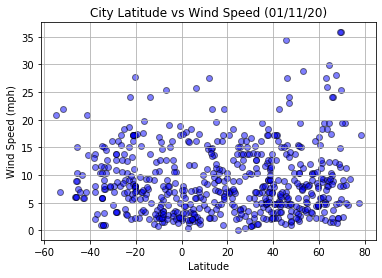

<Figure size 432x288 with 0 Axes>

In [36]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], color = 'blue', marker = 'o', edgecolor = 'black', alpha = ".5")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) 
plt.show()
plt.savefig("LatVsWindSpeed")